In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Loading data
netflix_df = pd.read_csv(r'C:\Users\pedro\Documents\Data Science\datasets\netflix titles\netflix_titles.csv')

In [2]:
netflix_df.head()

# Looking at the table I can easily transform type in a dummy variable.
# I can also create two new variable based on duration variable. One that represents the duration of a movie in terms of minutes and another that represents the duration of a TV Show in terms of seasons.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix_df.shape

(6234, 12)

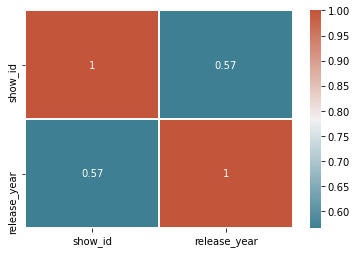

<Figure size 864x864 with 0 Axes>

In [4]:
netflix_df.corr()
sns.heatmap(netflix_df.corr(),annot=True, linewidth=1, cmap = sns.diverging_palette(220,20,as_cmap=True))
plt.figure(figsize=(12,12))
plt.show()

In [5]:
netflix_df.isnull().sum().sort_values(ascending = False)

# So, we have here some variables with a lot of NaN. Director is an important variable which will impact the model. Cast is an important info to relate movies and tv shows. Regarding date added and rating there are only a few values missing that can be imputed, so these two should not be a problem.

director        1969
cast             570
country          476
date_added        11
rating            10
description        0
listed_in          0
duration           0
release_year       0
title              0
type               0
show_id            0
dtype: int64

In [6]:
# Transforming type in a dummy variable in which 1 represents TV Show, 0 represents Movie.

type_dummy_conditions = [(netflix_df['type'] == 'TV Show'), (netflix_df['type'] == 'Movie')]
type_dummy_values = [1, 0]
netflix_df['type_dummy'] = np.select(type_dummy_conditions, type_dummy_values)

In [7]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_dummy
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0


In [8]:
netflix_df['listed_in'].nunique()

# So, this is not very easy to transform in a numeric variable. Listed_in is very drilled down so I am going for the broader categories (first category right before the comma). I will further extract only the general category.

461

In [9]:
# Maybe year, month and day are relevant, so I will create three new columns with day of the month added, month added and year added.

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added_with_missing'] = netflix_df['date_added'].dt.year
netflix_df['month_added_with_missing'] = netflix_df['date_added'].dt.month

# Filling year_added missing values based on type and release_year:

netflix_df['year_added'] = netflix_df.groupby(['type', 'release_year'])['year_added_with_missing'].transform(lambda x: x.fillna(x.mean()))
netflix_df['year_added'] = netflix_df['year_added'].astype(int)

netflix_df['month_added'] = netflix_df.groupby(['type', 'release_year'])['month_added_with_missing'].transform(lambda x: x.fillna(x.mean()))
netflix_df['month_added'] = netflix_df['month_added'].astype(int)

# Now, I think I cannot use month and day added. I am just going to leave this here in case I come up with something.

In [10]:
# Now, I will fill in the missing values of rating. Since there were only 10 values missing I checked which titles were these and they all seem to generally fit in the TV-PG rating which is like a generic rating, therefore, I will fill this missing values with TV-PG.
netflix_df['rating'].describe()
rating_frequency = netflix_df['rating'].value_counts()

print(rating_frequency)

netflix_df['rating'] = netflix_df['rating'].fillna('TV-PG')

print(netflix_df['rating'].isna().sum())

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64
0


In [11]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_dummy,year_added_with_missing,month_added_with_missing,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,2019.0,9.0,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,0,2016.0,9.0,2016,9
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,2017.0,9.0,2017,9


In [12]:
# Creating new variables to differentiate duration of a TV Show and duration of a Movie.

# Getting only numeric values from number of seasons of TV Shows:

netflix_df.loc[netflix_df['duration'].str.contains('Season'), 'tv_show_duration_with_missing'] = netflix_df['duration'].str[0:1]
netflix_df['tv_show_duration_with_missing'] = netflix_df['tv_show_duration_with_missing'].replace(' ', '')
netflix_df['tv_show_duration'] = netflix_df['tv_show_duration_with_missing'].fillna(0)
netflix_df['tv_show_duration'] = netflix_df['tv_show_duration'].astype(int)

print(netflix_df['tv_show_duration'].sum())


# Getting only numeric values for the duration of movies:

netflix_df.loc[netflix_df['duration'].str.contains('min'), 'movie_duration'] = netflix_df['duration'].str.replace('min', '')
netflix_df['movie_duration'] = netflix_df['movie_duration'].replace(' ', '')
netflix_df['movie_duration'] = netflix_df['movie_duration'].fillna(0)
netflix_df['movie_duration'] = netflix_df['movie_duration'].astype(int)

print(netflix_df['movie_duration'].sum())


# It could also be done with the following code:

# netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
# netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
# netflix_movies['duration']

3360
422665


In [13]:
netflix_df['main_category'] = netflix_df['listed_in'].str.split(",").str[0]
netflix_df['main_category'] = netflix_df['main_category'].replace(' ', '')

# Since there are a lot of categories which in essence are the same but written in a different way, I will structure this into fewer categories and merge cases like 'Comedies' with 'TV Comedies'.
netflix_df['main_category'] = netflix_df['main_category'].replace('TV Comedies', 'Comedies')
netflix_df['main_category'] = netflix_df['main_category'].replace('TV Action & Adventure', 'Action & Adventure')
netflix_df['main_category'] = netflix_df['main_category'].replace('Horror Movies', 'Horror')
netflix_df['main_category'] = netflix_df['main_category'].replace('TV Horror', 'Horror')
netflix_df['main_category'] = netflix_df['main_category'].replace('Anime Features', 'Anime Series')
netflix_df['main_category'] = netflix_df['main_category'].replace('Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows')
netflix_df['main_category'] = netflix_df['main_category'].replace('TV Dramas', 'Dramas')
netflix_df['main_category'] = netflix_df['main_category'].replace('Romantic Movies', 'Romantic')
netflix_df['main_category'] = netflix_df['main_category'].replace('Romantic TV Shows', 'Romantic')
netflix_df['main_category'] = netflix_df['main_category'].replace('TV Sci-Fi & Fantasy', 'Sci-Fi & Fantasy')
netflix_df['main_category'] = netflix_df['main_category'].replace('Classic Movies', 'Classic & Cult')
netflix_df['main_category'] = netflix_df['main_category'].replace('Classic & Cult TV', 'Classic & Cult')
netflix_df['main_category'] = netflix_df['main_category'].replace('Cult Movies', 'Classic & Cult')
netflix_df['main_category'] = netflix_df['main_category'].replace(['Sports Movies', 'Spanish-Language TV Shows', 'TV Shows', 'Movies'], 'Other')
netflix_df['main_category'] = netflix_df['main_category'].replace(['International Movies', 'International TV Shows'], 'International Productions')


print(netflix_df['main_category'].value_counts())

Dramas                          1133
Comedies                         892
International Productions        655
Documentaries                    644
Action & Adventure               627
Children & Family Movies         358
Crime TV Shows                   309
Stand-Up Comedy & Talk Shows     301
Kids' TV                         288
Horror                           214
British TV Shows                 210
Docuseries                       148
Anime Series                     129
Classic & Cult                    91
Other                             68
Reality TV                        63
Thrillers                         40
Romantic                          23
Independent Movies                18
Music & Musicals                  12
Sci-Fi & Fantasy                  11
Name: main_category, dtype: int64


In [14]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# text = list(set(main_category))
# plt.rcParams['figure.figsize'] = (10, 10)
# wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

# plt.imshow(wordcloud,interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [15]:
netflix_df.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,type_dummy,year_added_with_missing,month_added_with_missing,year_added,month_added,tv_show_duration_with_missing,tv_show_duration,movie_duration,main_category
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,...,Before planning an awesome wedding for his gra...,0,2019.0,9.0,2019,9,NaN,0,90,Children & Family Movies
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,...,Jandino Asporaat riffs on the challenges of ra...,0,2016.0,9.0,2016,9,NaN,0,94,Stand-Up Comedy & Talk Shows
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,...,"With the help of three human allies, the Autob...",1,2018.0,9.0,2018,9,1,1,0,Kids' TV
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,...,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0,2018,9,1,1,0,Kids' TV
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,...,When nerdy high schooler Dani finally attracts...,0,2017.0,9.0,2017,9,NaN,0,99,Comedies
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,...,A young journalist is forced into a life of cr...,1,2017.0,9.0,2017,9,1,1,0,Crime TV Shows
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,...,"In a dystopian future, an insurance adjuster f...",0,2017.0,9.0,2017,9,NaN,0,110,International Productions
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,...,Fabrizio Copano takes audience participation t...,0,2017.0,9.0,2017,9,NaN,0,60,Stand-Up Comedy & Talk Shows
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,...,"As California's 2016 fire season rages, brave ...",1,2017.0,9.0,2017,9,1,1,0,Docuseries
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,...,A struggling couple can't believe their luck w...,0,2017.0,9.0,2017,9,NaN,0,90,Action & Adventure


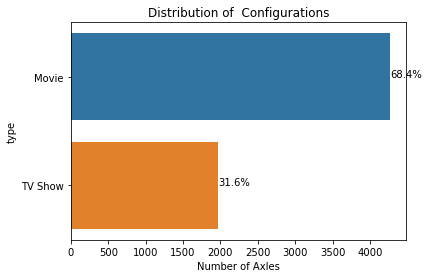

In [16]:
# Now that I arranged some details the way I wanted to see it I will start the exploratory data analysis phase.

movie_vs_tvShow = sns.countplot(y = 'type', data = netflix_df)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(netflix_df['type'])
for p in movie_vs_tvShow.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    movie_vs_tvShow.annotate(percentage, (x, y))
plt.show()

# So, around 1/3 of our dataset corresponds to TV Shows and 2/3 to Movies.

    year_added  count
0         2019   1546
1         2018   1290
2         2017    914
3         2016    264
4         2020    147
5         2015     58
6         2014     19
7         2011     13
8         2013      6
9         2012      4
10        2009      2
11        2010      1
12        2008      1
   year_added  count
0        2019    803
1        2018    493
2        2017    395
3        2016    193
4        2020     37
5        2015     32
6        2014      6
7        2013      6
8        2012      3
9        2008      1


[(2007.4, 2019.0)]

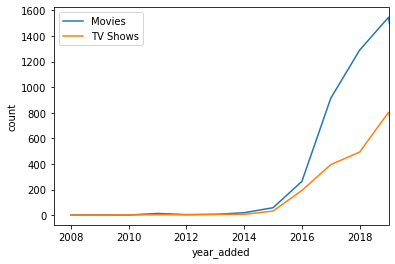

In [17]:
# Content variation over the years

movies = netflix_df[netflix_df['type'] == 'Movie']
tvShows = netflix_df[netflix_df['type'] == 'TV Show']

movies_per_year = movies['year_added'].value_counts().reset_index()
movies_per_year.columns = ['year_added', 'count']
tvShows_per_year = tvShows['year_added'].value_counts().reset_index()
tvShows_per_year.columns = ['year_added', 'count']

print(movies_per_year)
print(tvShows_per_year)

movies_line = sns.lineplot(x = movies_per_year['year_added'], y = movies_per_year['count'], label = 'Movies')
tvShows_line = sns.lineplot(x = tvShows_per_year['year_added'], y = tvShows_per_year['count'], label = 'TV Shows')

# Since 2020 value was too low I assumed this dataset was created in the early 2020, so it does not make sense to analyse date from the year 2020.
movies_line.set(xlim=(None,2019))
tvShows_line.set(xlim=(None,2019))

# It is possible to see that since 2015 Netflix has been expanding a lot its offer both in terms of Movies and TV Shows.

    month_added  count
0            12    473
1             1    458
2            10    441
3            11    421
4             3    391
5             8    334
6             7    313
7             4    308
8             9    307
9             5    295
10            2    263
11            6    261
    month_added  count
0            12    223
1            10    205
2            11    191
3             8    175
4             9    172
5             7    165
6             3    160
7             1    152
8             6    139
9             4    139
10            5    133
11            2    115


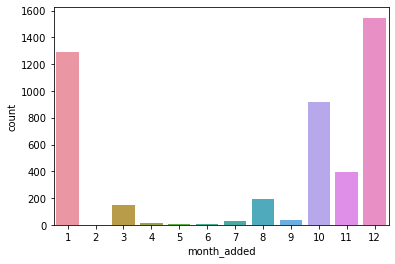

In [18]:
movies_per_month = movies['month_added'].value_counts().reset_index()
movies_per_month.columns = ['month_added', 'count']
tvShows_per_month = tvShows['month_added'].value_counts().reset_index()
tvShows_per_month.columns = ['month_added', 'count']

print(movies_per_month)
print(tvShows_per_month)

movies_line = sns.barplot(x = movies_per_month['month_added'], y = movies_per_year['count'], label = 'Movies')
tvShows_line = sns.barplot(x = tvShows_per_month['month_added'], y = tvShows_per_year['count'], label = 'TV Shows')

# There is a clear tendency to launch more content between october and january.

Content per year per month:
2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
Name: date_added, dtype: int64


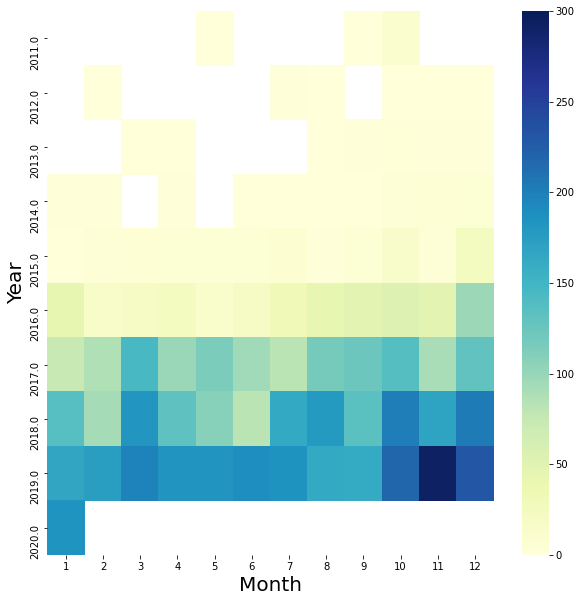

In [19]:
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64[ns]')
years = netflix_df['date_added'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in years.index:
       return year
month_vs_year = netflix_df.pivot_table(columns=netflix_df['date_added'].dt.month,index=netflix_df['date_added'].dt.year.apply(is_top_years),aggfunc='count',values='show_id')
month_vs_year.columns = month_vs_year.columns.astype(int)
print("Content per year per month:")
plt.figure(figsize=(10,10))
content_heatmap = sns.heatmap(month_vs_year, vmin=0, vmax=300, cmap="YlGnBu")
content_heatmap.set_xlabel('Month').set_size(20)
content_heatmap.set_ylabel('Year').set_size(20)

print(years)

99.10082063305978
1.7064499746063992


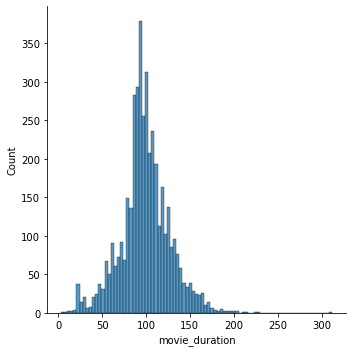

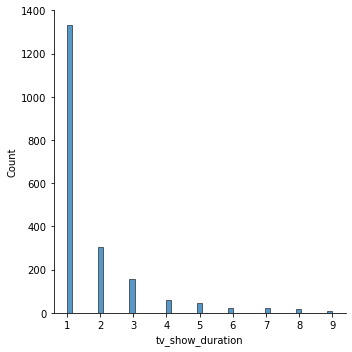

In [20]:
movie_duration_distribution = sns.displot(data = movies, x = "movie_duration")
tvShows_duration_distribution = sns.displot(data = tvShows, x = 'tv_show_duration')

print(movies['movie_duration'].mean())
print(tvShows['tv_show_duration'].mean())

# Movies have around 99 min (1h39) duration and tv shows last around 1.7 seasons.

In [21]:
# Now I am going to join movies ratings from IMDB to add to my suggestion algorithm.

imdb_movies = pd.read_csv(r'C:\Users\pedro\Documents\Data Science\datasets\movies imdb\IMDb movies.csv')
imdb_ratings = pd.read_csv(r'C:\Users\pedro\Documents\Data Science\datasets\movies imdb\IMDb ratings.csv')

print(imdb_movies.head())
print(imdb_ratings.head())

# So, I only need imdb_title_id, title, year, date_published, genre, duration, country, director, actors, description from imdb_movies and weighted_average_vote from imdb_ratings.

imdb_ratings_only = imdb_ratings[['imdb_title_id', 'weighted_average_vote']]

imdb_df = imdb_movies.join(imdb_ratings_only.set_index('imdb_title_id'), on='imdb_title_id')

C:\Users\pedro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  imdb_title_id                        title               original_title  \
0     tt0000009                   Miss Jerry                   Miss Jerry   
1     tt0000574  The Story of the Kelly Gang  The Story of the Kelly Gang   
2     tt0001892               Den sorte drøm               Den sorte drøm   
3     tt0002101                    Cleopatra                    Cleopatra   
4     tt0002130                    L'Inferno                    L'Inferno   

   year date_published                      genre  duration           country  \
0  1894     1894-10-09                    Romance        45               USA   
1  1906     1906-12-26    Biography, Crime, Drama        70         Australia   
2  1911     1911-08-19                      Drama        53  Germany, Denmark   
3  1912     1912-11-13             Drama, History       100               USA   
4  1911     1911-03-06  Adventure, Drama, Fantasy        68             Italy   

  language                             director  .

In [22]:
imdb_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0


In [23]:
imdb_df.isna().sum().sort_values(ascending = False)

# Variables metascore, usa_gross_income, budget, worldwide_gross_income have a lot of NaN values so I will drop these variables. Gross income and budget would be very interesting variables if they did not have such a value of NaN.

metascore                72550
usa_gross_income         70529
budget                   62145
worlwide_gross_income    54839
reviews_from_critics     11797
reviews_from_users        7597
production_company        4455
description               2115
writer                    1572
language                   833
director                    87
actors                      69
country                     64
original_title               0
date_published               0
title                        0
year                         0
weighted_average_vote        0
genre                        0
duration                     0
avg_vote                     0
votes                        0
imdb_title_id                0
dtype: int64

In [24]:
imdb_df = imdb_df.drop(columns = ['metascore', 'usa_gross_income', 'budget', 'worlwide_gross_income', 'original_title'])

In [25]:
imdb_df.drop_duplicates()
imdb_df.dropna(subset=['title', 'weighted_average_vote'], how='all', inplace=True)
imdb_df.shape

(85855, 18)

In [26]:
imdb_df.isna().sum().sort_values(ascending = False)

reviews_from_critics     11797
reviews_from_users        7597
production_company        4455
description               2115
writer                    1572
language                   833
director                    87
actors                      69
country                     64
genre                        0
title                        0
year                         0
date_published               0
weighted_average_vote        0
duration                     0
avg_vote                     0
votes                        0
imdb_title_id                0
dtype: int64

In [27]:
country_count = imdb_df['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count[0:10]) # top 10 countries

print(country_count)

           country
USA          28511
India         6065
UK            4111
Japan         3077
France        3055
Italy         2444
Canada        1802
Germany       1396
Turkey        1351
Hong Kong     1239


In [28]:
year_count = imdb_df['year'].value_counts().sort_values(ascending = False)
year_count = pd.DataFrame(year_count[0:10]) # top 10 years with most movies released

print(year_count)

      year
2017  3223
2018  3182
2016  2992
2015  2764
2014  2517
2011  2364
2009  2280
2010  2257
2019  2168
2008  2164


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Removing stopwords such as “the”, “a”, “an”, “in”, etc in english (since the dataset language is english)
tfidf = TfidfVectorizer(stop_words='english')

# Filling NaN values with no word
netflix_df['description'] = netflix_df['description'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

# So, there are 16151 words in the descriptions of the 6234 movies of the dataset.

(6234, 16151)

In [30]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel


# Create a new column in netflix dataframe with title lowecased for user search purposes
netflix_df["title_lowercase"] = netflix_df["title"].str.lower()

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(netflix_df.index, index = netflix_df['title_lowercase']).drop_duplicates()

In [31]:
def get_recommendations (title_lowercase, cosine_sim=cosine_sim):
    idx = indices[title_lowercase]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title_lowercase'].iloc[movie_indices]

In [32]:
get_recommendations('peaky blinders') # first recommendation model just based on description

296                     our godfather
4491                              don
2015                         the fear
4852    jonathan strange & mr norrell
1231                       the prison
3737                power rangers zeo
5986                       the tudors
1753      once upon a time in mumbaai
5494     the legend of michael mishra
1142                  shelby american
Name: title_lowercase, dtype: object

In [33]:
netflix_df_filled = netflix_df.fillna('')
netflix_df_filled.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,type_dummy,year_added_with_missing,month_added_with_missing,year_added,month_added,tv_show_duration_with_missing,tv_show_duration,movie_duration,main_category,title_lowercase
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09 00:00:00,2019,TV-PG,90 min,...,0,2019,9,2019,9,,0,90,Children & Family Movies,norm of the north: king sized adventure
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09 00:00:00,2016,TV-MA,94 min,...,0,2016,9,2016,9,,0,94,Stand-Up Comedy & Talk Shows,jandino: whatever it takes
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08 00:00:00,2013,TV-Y7-FV,1 Season,...,1,2018,9,2018,9,1,1,0,Kids' TV,transformers prime
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08 00:00:00,2016,TV-Y7,1 Season,...,1,2018,9,2018,9,1,1,0,Kids' TV,transformers: robots in disguise
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08 00:00:00,2017,TV-14,99 min,...,0,2017,9,2017,9,,0,99,Comedies,#realityhigh


In [34]:
# Cleaning spaces and lowercase data for user search purposes
def clean_data(x):
        return str.lower(x.replace(" ", ""))
    
# Features that are going to be used for the recommendation
features=['title','director','cast','listed_in','description']
netflix_df_filled = netflix_df_filled[features]

for feature in features:
    netflix_df_filled[feature] = netflix_df_filled[feature].apply(clean_data)
    
netflix_df_filled.head()

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...
2,transformersprime,,"petercullen,sumaleemontano,frankwelker,jeffrey...",kids'tv,"withthehelpofthreehumanallies,theautobotsoncea..."
3,transformers:robotsindisguise,,"willfriedle,darrencriss,constancezimmer,kharyp...",kids'tv,whenaprisonshipcrashunleasheshundredsofdecepti...
4,#realityhigh,fernandolebrija,"nestacooper,katewalsh,johnmichaelhiggins,keith...",comedies,whennerdyhighschoolerdanifinallyattractstheint...


In [35]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [36]:
netflix_df_filled['soup'] = netflix_df_filled.apply(create_soup, axis=1)

In [37]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(netflix_df_filled['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [38]:
netflix_df_filled = netflix_df_filled.reset_index()
indices = pd.Series(netflix_df_filled.index, index=netflix_df_filled['title'])

In [39]:
def get_recommendations_new (title, cosine_sim = cosine_sim):
    title = title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]

In [43]:
print('Top 10 Recommendations:')
get_recommendations_new('black mirror', cosine_sim2)

Top 10 Recommendations:


3220                                       Dracula
4807           The Dark Crystal: Age of Resistance
4371                                Watership Down
233     How to Live Mortgage Free with Sarah Beeny
6180                                         Vexed
193                                  Forget Me Not
234                          Inside The Freemasons
645                        Interior Design Masters
735                                 Ajaibnya Cinta
910                        Three Wives One Husband
Name: title, dtype: object